In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('sales-data.csv',parse_dates=['barr_date'])
data = data[(data.region_name=="North America") & (data.business_area_name=="F00 - GCCT")]
data.rename(columns={"barr_date":"date","revenue": "sales"}, inplace=True)
display(data.head())

data = data[['date','sales']]
data.reset_index(drop=True, inplace=True)
data.head()

,business_area_name,region_name,date,sales
66,F00 - GCCT,North America,2017-01-01,607278.59
93,F00 - GCCT,North America,2017-02-01,517482.14
97,F00 - GCCT,North America,2017-03-01,540672.79
128,F00 - GCCT,North America,2017-04-01,596165.84
156,F00 - GCCT,North America,2017-05-01,692760.20


,date,sales
0,2017-01-01,607278.59
1,2017-02-01,517482.14
2,2017-03-01,540672.79
3,2017-04-01,596165.84
4,2017-05-01,692760.20


In [3]:
data.shape

(60, 2)

<AxesSubplot:xlabel='Date', ylabel='Values'>

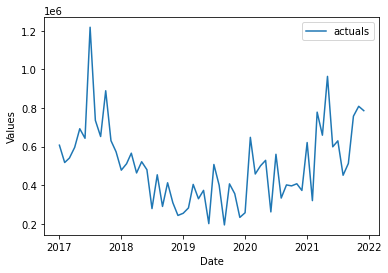

In [4]:
f = Forecaster(y=data['sales'],current_dates=data['date'])
f.plot()

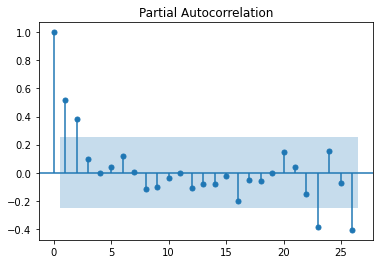

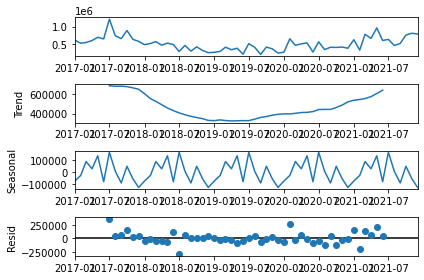

In [5]:
f.plot_pacf(lags=26)
plt.show()

f.seasonal_decompose().plot()
plt.show()

In [6]:
f.set_test_length(12)
f.generate_future_dates(12)
f.set_estimator('lstm')

In [ ]:
f.manual_forecast(call_me='lstm',
                  lags=12,
                  batch_size=16,
                  epochs=200,
                  validation_split=.20,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(100,)*15,
                  dropout=(0,)*15,
                  plot_loss=True)

Epoch 1/200
2/2 [==============================] - 44s 9s/step - loss: 0.1680 - val_loss: 0.1551
Epoch 2/200
2/2 [==============================] - 0s 157ms/step - loss: 0.1550 - val_loss: 0.1273
Epoch 3/200
2/2 [==============================] - 0s 170ms/step - loss: 0.1318 - val_loss: 0.1005
Epoch 4/200
2/2 [==============================] - 0s 176ms/step - loss: 0.1027 - val_loss: 0.1324
Epoch 5/200
2/2 [==============================] - 0s 163ms/step - loss: 0.1213 - val_loss: 0.1119
Epoch 6/200
2/2 [==============================] - 0s 159ms/step - loss: 0.1019 - val_loss: 0.0981
Epoch 7/200
2/2 [==============================] - 0s 148ms/step - loss: 0.1011 - val_loss: 0.0964
Epoch 8/200
2/2 [==============================] - 0s 155ms/step - loss: 0.1033 - val_loss: 0.0983
Epoch 9/200
2/2 [==============================] - 0s 158ms/step - loss: 0.1016 - val_loss: 0.1010
Epoch 10/200
2/2 [==============================] - 0s 155ms/step - loss: 0.0983 - val_loss: 0.1078
Epoch 11/20

2/2 [==============================] - 0s 158ms/step - loss: 0.0954 - val_loss: 0.1018
Epoch 84/200
2/2 [==============================] - 0s 158ms/step - loss: 0.0954 - val_loss: 0.1018
Epoch 85/200
2/2 [==============================] - 0s 157ms/step - loss: 0.0951 - val_loss: 0.1023
Epoch 86/200
2/2 [==============================] - 0s 153ms/step - loss: 0.0948 - val_loss: 0.1021
Epoch 87/200
2/2 [==============================] - 0s 172ms/step - loss: 0.0948 - val_loss: 0.1014
Epoch 88/200
2/2 [==============================] - 0s 157ms/step - loss: 0.0947 - val_loss: 0.1004
Epoch 89/200
2/2 [==============================] - 0s 156ms/step - loss: 0.0947 - val_loss: 0.1001
Epoch 90/200
2/2 [==============================] - 0s 165ms/step - loss: 0.0947 - val_loss: 0.1004
Epoch 91/200
2/2 [==============================] - 0s 159ms/step - loss: 0.0949 - val_loss: 0.1010
Epoch 92/200
2/2 [==============================] - 0s 155ms/step - loss: 0.0947 - val_loss: 0.1017
Epoch 93/200


2/2 [==============================] - 0s 157ms/step - loss: 0.0948 - val_loss: 0.1076
Epoch 165/200
2/2 [==============================] - 0s 156ms/step - loss: 0.0949 - val_loss: 0.1066
Epoch 166/200
2/2 [==============================] - 0s 159ms/step - loss: 0.0948 - val_loss: 0.1047
Epoch 167/200
2/2 [==============================] - 0s 157ms/step - loss: 0.0950 - val_loss: 0.1035
Epoch 168/200
2/2 [==============================] - 0s 155ms/step - loss: 0.0953 - val_loss: 0.1031
Epoch 169/200
2/2 [==============================] - 0s 167ms/step - loss: 0.0952 - val_loss: 0.1032
Epoch 170/200
2/2 [==============================] - 0s 168ms/step - loss: 0.0951 - val_loss: 0.1039
Epoch 171/200
2/2 [==============================] - 0s 158ms/step - loss: 0.0948 - val_loss: 0.1047
Epoch 172/200
2/2 [==============================] - 0s 160ms/step - loss: 0.0947 - val_loss: 0.1048
Epoch 173/200
2/2 [==============================] - 0s 159ms/step - loss: 0.0945 - val_loss: 0.1042
Epoc

Epoch 46/200
2/2 [==============================] - 0s 174ms/step - loss: 0.1246 - val_loss: 0.1049
Epoch 47/200
2/2 [==============================] - 0s 184ms/step - loss: 0.1246 - val_loss: 0.1062
Epoch 48/200
2/2 [==============================] - 0s 177ms/step - loss: 0.1245 - val_loss: 0.1054
Epoch 49/200
2/2 [==============================] - 0s 177ms/step - loss: 0.1246 - val_loss: 0.1054
Epoch 50/200
2/2 [==============================] - 0s 179ms/step - loss: 0.1245 - val_loss: 0.1073
Epoch 51/200
2/2 [==============================] - 0s 164ms/step - loss: 0.1244 - val_loss: 0.1079
Epoch 52/200
2/2 [==============================] - 0s 173ms/step - loss: 0.1245 - val_loss: 0.1064
Epoch 53/200
2/2 [==============================] - 0s 174ms/step - loss: 0.1244 - val_loss: 0.1049
Epoch 54/200
2/2 [==============================] - 0s 178ms/step - loss: 0.1246 - val_loss: 0.1044
Epoch 55/200
2/2 [==============================] - 0s 181ms/step - loss: 0.1247 - val_loss: 0.1060


<AxesSubplot:xlabel='Date', ylabel='Values'>

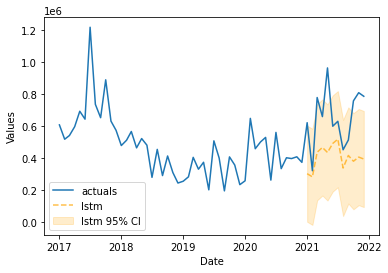

In [8]:
f.plot_test_set(ci=True)

<AxesSubplot:xlabel='Date', ylabel='Values'>

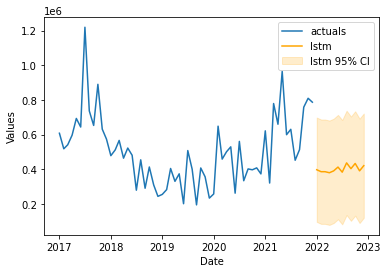

In [9]:
f.generate_future_dates(12)
f.add_time_trend()
f.export(to_excel=True,excel_name='results.xlsx')
f.plot(ci=True)

In [10]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,lstm,0.35,295271.72,-2.06,True


In [11]:
test_2021 = f.export_test_set_preds_with_cis('lstm')
display(test_2021.head(12))

predicted_2022 = f.export_forecasts_with_cis('lstm')
display(predicted_2022.head(12))

,DATE,UpperPreds,Preds,Actuals,LowerPreds,ModelNickname,CILevel
0,2021-01-01,602612.82,301459.46,621142.56,306.10,lstm,0.95
1,2021-02-01,582909.53,281756.18,319882.97,-19397.18,lstm,0.95
2,2021-03-01,736976.26,435822.90,778742.24,134669.54,lstm,0.95
3,2021-04-01,767075.67,465922.31,659178.31,164768.95,lstm,0.95
4,2021-05-01,735680.02,434526.66,964214.10,133373.30,lstm,0.95
5,2021-06-01,792170.16,491016.81,598972.89,189863.45,lstm,0.95
6,2021-07-01,818911.85,517758.49,629920.87,216605.14,lstm,0.95
7,2021-08-01,638258.08,337104.72,451440.21,35951.36,lstm,0.95
8,2021-09-01,716991.95,415838.60,512584.10,114685.24,lstm,0.95
9,2021-10-01,680691.37,379538.01,757788.45,78384.65,lstm,0.95


,DATE,UpperForecast,Forecast,LowerForecast,ModelNickname,CILevel
0,2022-01-01,697916.02,396762.66,95609.30,lstm,0.95
1,2022-02-01,686513.59,385360.23,84206.87,lstm,0.95
2,2022-03-01,686565.32,385411.96,84258.60,lstm,0.95
3,2022-04-01,680457.01,379303.65,78150.29,lstm,0.95
4,2022-05-01,691109.78,389956.42,88803.06,lstm,0.95
5,2022-06-01,713205.83,412052.47,110899.11,lstm,0.95
6,2022-07-01,683722.31,382568.95,81415.59,lstm,0.95
7,2022-08-01,737344.26,436190.90,135037.54,lstm,0.95
8,2022-09-01,703942.70,402789.34,101635.98,lstm,0.95
9,2022-10-01,734009.46,432856.11,131702.75,lstm,0.95


In [12]:
Total_2021 = test_2021['Actuals'].sum()
Total_2022 = predicted_2022['Forecast'].sum()

Yoy_growth = (Total_2022 - Total_2021)/ Total_2021 * 100

print(f'Total_2021:{Total_2021}')
print(f'Total_2022:{Total_2022}')
print(f'YOY (growth):{Yoy_growth}')

Total_2021:7889437.50928
Total_2022:4813661.537840491
YOY (growth):-38.98599827708386
